### `Import Libraries`

In [3]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.patches as patches
import matplotlib.pyplot as plt 
import seaborn as sns
from io import StringIO 
from IPython.core.display import display, HTML
%matplotlib inline

### `Sample Data`

In [4]:
# Sample Data
data = """ 
start,end,event,counts,categ
2016-10-02 16:58:00,2016-10-02 16:59:00,700,181,low
2016-10-03 16:58:00,2016-10-03 16:59:00,600,281,high
2016-10-04 16:58:00,2016-10-04 16:59:00,610,191,avg
2016-10-05 16:58:00,2016-10-05 16:59:00,920,244,high
"""

df = pd.read_table(StringIO(data), sep=",")
df.start = pd.to_datetime(df.start, format="%Y-%m-%d %H:%M:%S")
df["start_str_H_M"] = df.start.apply(lambda x : datetime.datetime.strftime(x, "%Y-%m-%d %H:%M"))
df.end = pd.to_datetime(df.end, format="%Y-%m-%d %H:%M:%S")
display(HTML(df.to_html()))

,start,end,event,counts,categ,start_str_H_M
0,2016-10-02 16:58:00,2016-10-02 16:59:00,700,181,low,2016-10-02 16:58
1,2016-10-03 16:58:00,2016-10-03 16:59:00,600,281,high,2016-10-03 16:58
2,2016-10-04 16:58:00,2016-10-04 16:59:00,610,191,avg,2016-10-04 16:58
3,2016-10-05 16:58:00,2016-10-05 16:59:00,920,244,high,2016-10-05 16:58


In [8]:
df.dtypes

start            datetime64[ns]
end              datetime64[ns]
event                     int64
counts                    int64
categ                    object
start_str_H_M            object
dtype: object

### `Scatter Plot`

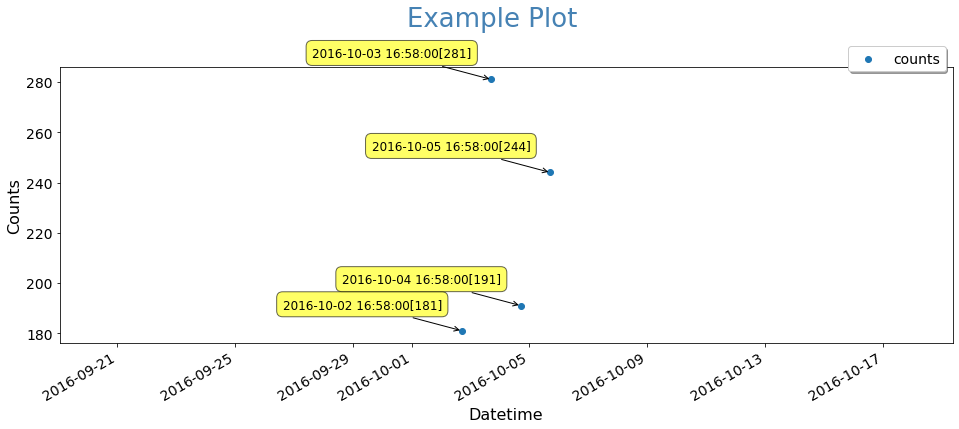

In [13]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(16, 6))

labels_list = df["categ"].tolist()

# sns.scatterplot(x="start", y="counts", data=df, marker="o", ax=axes, s=90, legend="full", alpha=1, color="grey")
plt.scatter(x="start", y="counts", data=df, marker="o")

x_values = df["start"].tolist()
y_values = df["counts"].tolist()

# labels = ["_".join(str(x), str(y)) for (x, y) in zip(x_values, y_values)]
labels = [(str(x) +"["+ str(y)) +"]"for (x, y) in zip(x_values, y_values)]

# Annotate
for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(label, 
                 xy=(x,y), 
                 xytext=(-20, 20), 
                 fontsize=12, 
                 textcoords="offset points", ha="right", va="bottom", 
                 bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.6), 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0")
                 )

axes.set_ylabel("Counts", fontsize=16)
axes.set_xlabel("Datetime", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.legend(bbox_to_anchor=(1,1.1), fancybox=True, shadow=True, ncol=6, loc="upper right", prop={"size":14})
plt.suptitle("Example Plot", size=26, color="steelblue")
plt.subplots_adjust(top=.84, wspace=0.3)
plt.gcf().autofmt_xdate()
plt.show()